### 載入工具

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### 資料：訓練集、標籤集

(200, 2)


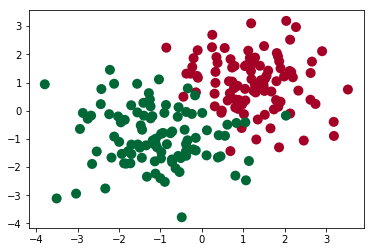

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(1*n_data, 1)      # class0 x shape=(100, 2)
y0 = np.zeros((100, 2))                 # class0 y shape=(100, 2)
y0[:,1] = 1                             # [[0, 1], ..., [0, 1]]
x1 = np.random.normal(-1*n_data, 1)     # class1 x shape=(100, 2)
y1 = np.zeros((100, 2))                 # class0 y shape=(100, 2)
y1[:,0] = 1                             # [[1, 0], ..., [1, 0]]
x_train = np.vstack((x0, x1))           # shape (200, 2) + some noise
y_train = np.vstack((y0, y1))           # shape (200, )
print(y_train.shape)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:,0].reshape(200,), s=100, lw=0, cmap='RdYlGn')
plt.show()

### 建構 Tensorflow 的 Graph

In [3]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 2])

hypothesis = tf.layers.dense(x, 2)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=hypothesis))
hypothesis = tf.nn.softmax(hypothesis)

train = tf.train.GradientDescentOptimizer(learning_rate=0.003).minimize(cost)

predict = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32)) 

### 建 Session、初始變數、開始訓練

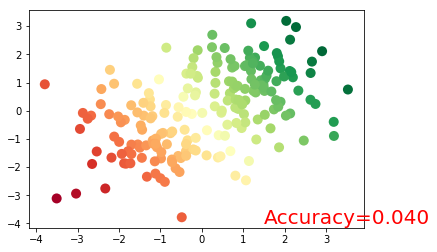

0 0.04 1.1400791


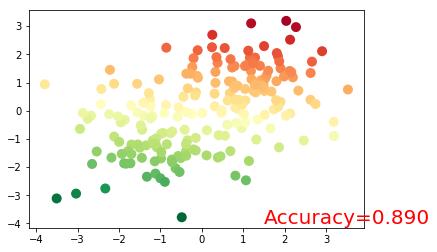

100 0.89 0.6540742


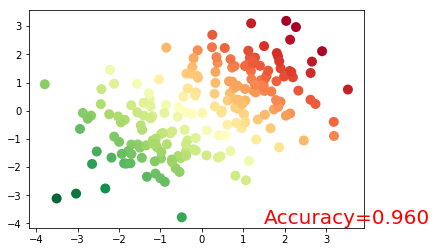

200 0.96 0.4531101


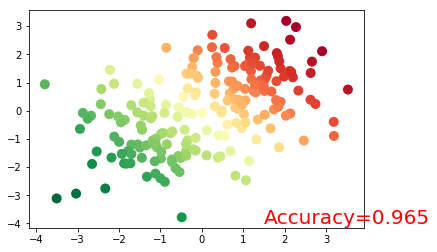

300 0.965 0.35832664


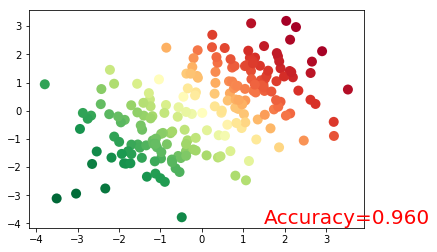

400 0.96 0.3046176


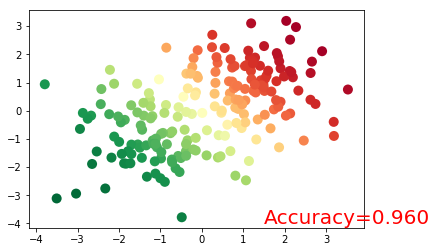

500 0.96 0.27012134


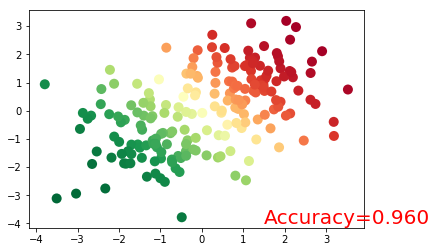

600 0.96 0.24603863


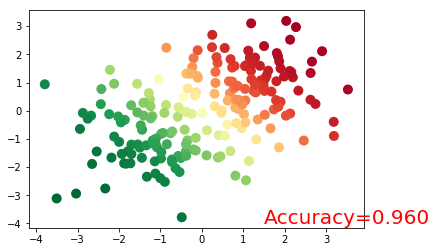

700 0.96 0.22821972


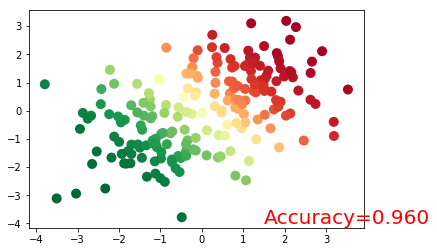

800 0.96 0.21446405


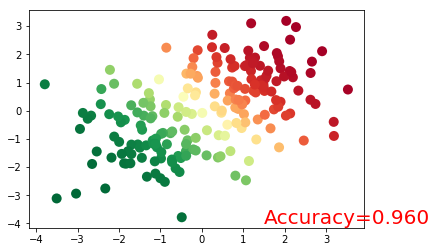

900 0.96 0.2034979


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1000):
    y_, a_, c_, _ = sess.run([hypothesis, accuracy, cost, train], feed_dict={x:x_train, y:y_train})
#     y_, a_, c_, _ = sess.run([hypothesis, accuracy, cost, train], feed_dict={x:x_train, y:y_train})
    if step%100 == 0:
        plt.cla()
        plt.scatter(x_train[:, 0], x_train[:, 1], c=y_[:,0].reshape(200, ), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.3f' % a_, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        print(step, a_, c_)
plt.show()

### 預測新資料

[[0.7430741  0.25692588]]


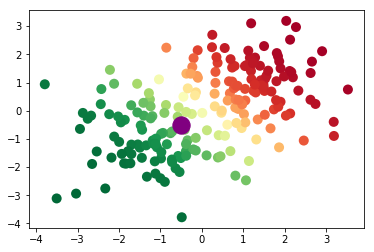

In [5]:
x_new = np.array([[-0.5, -0.5]])
print(sess.run(hypothesis, feed_dict={x:x_new}))
# print(sess.run(hypothesis, feed_dict={x:x_new}))

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_[:,0].reshape(200, ), s=100, lw=0, cmap='RdYlGn')
plt.scatter(x_new[0, 0], x_new[0, 1], c='purple', s=300)
plt.show()